In [1]:
from rdkit.Chem import AllChem as Chem
from rdkit.Chem import Draw
from rdkit.Chem.Draw import IPythonConsole
import csv

In [2]:
with open('chembl_thrombin_ic50.csv', 'r') as csvfile:
    reader = csv.DictReader(csvfile, delimiter=";")
    thrombin_ligands = [Chem.MolFromSmiles(m['Smiles']) for m in reader]

suppl = Chem.SDMolSupplier('drugbank.sdf')
drugs = [m for m in suppl if m]

RDKit ERROR: [20:07:05] Explicit valence for atom # 7 N, 4, is greater than permitted
RDKit ERROR: [20:07:05] ERROR: Could not sanitize molecule ending on line 20009
RDKit WARNING: [20:07:05] Warning: conflicting stereochemistry at atom 5 ignored.
RDKit WARNING: [20:07:05] Warning: conflicting stereochemistry at atom 5 ignored.
RDKit ERROR: [20:07:05] ERROR: Explicit valence for atom # 7 N, 4, is greater than permitted
RDKit ERROR: [20:07:06] Can't kekulize mol.  Unkekulized atoms: 1 2 3 5 6 7 8 9 10
RDKit ERROR: 
RDKit ERROR: [20:07:06] ERROR: Could not sanitize molecule ending on line 250947
RDKit ERROR: [20:07:06] ERROR: Can't kekulize mol.  Unkekulized atoms: 1 2 3 5 6 7 8 9 10
RDKit ERROR: 
RDKit ERROR: [20:07:06] Explicit valence for atom # 17 O, 3, is greater than permitted
RDKit ERROR: [20:07:06] ERROR: Could not sanitize molecule ending on line 258130
RDKit ERROR: [20:07:06] ERROR: Explicit valence for atom # 17 O, 3, is greater than permitted
RDKit ERROR: [20:07:06] Can't kek

RDKit ERROR: [20:07:06] ERROR: Can't kekulize mol.  Unkekulized atoms: 0 1 2 3 4 5 6 7 8
RDKit ERROR: 
RDKit ERROR: [20:07:06] Can't kekulize mol.  Unkekulized atoms: 3 4 5 6 8 9 10
RDKit ERROR: 
RDKit ERROR: [20:07:06] ERROR: Could not sanitize molecule ending on line 442989
RDKit ERROR: [20:07:06] ERROR: Can't kekulize mol.  Unkekulized atoms: 3 4 5 6 8 9 10
RDKit ERROR: 
RDKit ERROR: [20:07:06] Can't kekulize mol.  Unkekulized atoms: 3 4 5 6 9
RDKit ERROR: 
RDKit ERROR: [20:07:06] ERROR: Could not sanitize molecule ending on line 447465
RDKit ERROR: [20:07:06] ERROR: Can't kekulize mol.  Unkekulized atoms: 3 4 5 6 9
RDKit ERROR: 
RDKit ERROR: [20:07:06] Can't kekulize mol.  Unkekulized atoms: 16 17 18 19 20
RDKit ERROR: 
RDKit ERROR: [20:07:06] ERROR: Could not sanitize molecule ending on line 466177
RDKit ERROR: [20:07:06] ERROR: Can't kekulize mol.  Unkekulized atoms: 16 17 18 19 20
RDKit ERROR: 
RDKit ERROR: [20:07:06] Can't kekulize mol.  Unkekulized atoms: 7 8 9 10 17
RDKit ERR

RDKit ERROR: [20:07:07] ERROR: Can't kekulize mol.  Unkekulized atoms: 0 1 2 4 5 6 7 8 9 10
RDKit ERROR: 
RDKit ERROR: [20:07:08] Explicit valence for atom # 0 Be, 3, is greater than permitted
RDKit ERROR: [20:07:08] ERROR: Could not sanitize molecule ending on line 995692
RDKit ERROR: [20:07:08] ERROR: Explicit valence for atom # 0 Be, 3, is greater than permitted
RDKit ERROR: [20:07:08] Explicit valence for atom # 0 C greater than permitted
RDKit ERROR: [20:07:08] ERROR: Could not sanitize molecule ending on line 1151592


In [3]:
def compareECFPProportions(lig, db):
    np.set_printoptions(suppress=True)
    lig_sum = np.zeros(len(lig[0]))
    db_sum = np.zeros(len(db[0]))
    for l in lig:
        for i,b in enumerate(l.ToBitString()):
            if int(b) == 1:
                lig_sum[i] += 1
    for d in db:
        for i, b in enumerate(d.ToBitString()):
            if int(b) == 1:
                db_sum[i] += 1
    lig_prop = np.divide(lig_sum,len(lig))
    db_prop = np.divide(db_sum, len(db))
    proportions = np.subtract(lig_prop, db_prop)
    proportions_dict = dict(enumerate(proportions))
    proportions_sorted = {k: v for k,v in sorted(proportions_dict.items(), key=lambda x:x[1])}
    return proportions_sorted

In [4]:
fp_ligands = [Chem.GetMorganFingerprintAsBitVect(l, 2, nBits = 1024) for l in thrombin_ligands]
fp_drugbank = [Chem.GetMorganFingerprintAsBitVect(d, 2, nBits = 1024) for d in drugs]
len(fp_ligands), len(fp_drugbank)

(3236, 7113)

In [5]:
thrombin_ligands_ecfp = [Chem.GetMorganFingerprintAsBitVect(m, 2, nBits=1024)
                     for m in thrombin_ligands]
drugs_ecfp = [Chem.GetMorganFingerprintAsBitVect(m, 2, nBits=1024) for m in drugs]

In [6]:
thrombin_ligands_ecfp_sums = [0]*thrombin_ligands_ecfp[0].GetNumBits()
for key in thrombin_ligands_ecfp:
    for onbit in key.GetOnBits():
        thrombin_ligands_ecfp_sums[onbit] += 1
thrombin_ligands_ecfp_sums

[74,
 1499,
 270,
 62,
 1036,
 404,
 6,
 26,
 102,
 141,
 56,
 65,
 14,
 111,
 377,
 692,
 75,
 34,
 26,
 97,
 98,
 268,
 17,
 238,
 136,
 58,
 67,
 8,
 7,
 298,
 7,
 69,
 55,
 2142,
 107,
 31,
 290,
 20,
 233,
 216,
 109,
 822,
 934,
 39,
 27,
 295,
 237,
 19,
 5,
 12,
 32,
 96,
 39,
 286,
 147,
 12,
 18,
 14,
 199,
 63,
 63,
 255,
 192,
 181,
 2088,
 208,
 89,
 28,
 23,
 213,
 36,
 11,
 196,
 472,
 50,
 120,
 90,
 95,
 86,
 500,
 2886,
 56,
 889,
 87,
 63,
 86,
 293,
 77,
 53,
 81,
 414,
 44,
 69,
 54,
 380,
 49,
 68,
 49,
 32,
 61,
 24,
 67,
 237,
 10,
 115,
 20,
 83,
 55,
 463,
 69,
 120,
 26,
 176,
 37,
 349,
 58,
 219,
 962,
 95,
 240,
 9,
 362,
 29,
 114,
 73,
 140,
 82,
 13,
 2552,
 22,
 79,
 60,
 19,
 80,
 100,
 43,
 462,
 35,
 104,
 151,
 1910,
 14,
 60,
 344,
 305,
 224,
 78,
 2354,
 15,
 23,
 24,
 67,
 84,
 24,
 53,
 69,
 339,
 141,
 38,
 13,
 74,
 19,
 285,
 170,
 32,
 221,
 60,
 116,
 87,
 206,
 6,
 120,
 32,
 171,
 5,
 1644,
 9,
 26,
 6,
 55,
 121,
 35,
 17,
 54,
 137,
 

In [7]:
drugs_ecfp_sums = [0]*drugs_ecfp[0].GetNumBits()
for key in drugs_ecfp:
    for onbit in key.GetOnBits():
        drugs_ecfp_sums[onbit] += 1
drugs_ecfp_sums

[120,
 2360,
 285,
 317,
 939,
 231,
 29,
 138,
 213,
 303,
 260,
 258,
 68,
 665,
 227,
 828,
 103,
 104,
 93,
 187,
 118,
 203,
 63,
 237,
 153,
 162,
 127,
 111,
 62,
 211,
 69,
 172,
 158,
 4264,
 155,
 111,
 1076,
 73,
 87,
 207,
 79,
 440,
 648,
 112,
 78,
 261,
 319,
 76,
 52,
 97,
 89,
 123,
 245,
 271,
 100,
 63,
 105,
 85,
 158,
 178,
 69,
 179,
 204,
 219,
 2683,
 147,
 55,
 173,
 97,
 226,
 76,
 345,
 179,
 388,
 255,
 465,
 76,
 283,
 134,
 479,
 4939,
 169,
 152,
 122,
 313,
 87,
 270,
 124,
 107,
 105,
 1541,
 90,
 160,
 54,
 308,
 97,
 114,
 158,
 96,
 87,
 61,
 119,
 402,
 60,
 194,
 160,
 246,
 79,
 173,
 84,
 162,
 73,
 534,
 56,
 797,
 155,
 395,
 608,
 349,
 767,
 78,
 767,
 118,
 165,
 82,
 193,
 109,
 47,
 2503,
 89,
 337,
 123,
 98,
 162,
 127,
 52,
 625,
 56,
 515,
 399,
 667,
 59,
 125,
 150,
 289,
 198,
 99,
 2457,
 87,
 79,
 106,
 104,
 370,
 64,
 67,
 126,
 66,
 183,
 282,
 48,
 160,
 45,
 232,
 135,
 134,
 262,
 107,
 98,
 73,
 96,
 129,
 261,
 137,
 202,


In [8]:
thrombin_ligands_ecfp_scaled = [x/len(thrombin_ligands_ecfp) for x in thrombin_ligands_ecfp_sums]
drugs_ecfp_scaled = [x/len(drugs_ecfp) for x in drugs_ecfp_sums]
drugs_ecfp_scaled

[0.01687051876845213,
 0.3317868691128919,
 0.04006748207507381,
 0.044566287079994375,
 0.13201180936313792,
 0.03247574862927035,
 0.004077042035709265,
 0.01940109658371995,
 0.029945170814002532,
 0.04259805989034163,
 0.036552790664979615,
 0.036271615352172076,
 0.009559960635456208,
 0.09349079150850555,
 0.03191339800365528,
 0.1164065795023197,
 0.014480528609588077,
 0.014621116265991847,
 0.013074652045550401,
 0.026289891747504568,
 0.016589343455644594,
 0.028539294249964854,
 0.008857022353437369,
 0.03331927456769296,
 0.021509911429776464,
 0.022775200337410376,
 0.017854632363278503,
 0.01560522986081822,
 0.008716434697033601,
 0.029663995501194994,
 0.009700548291859975,
 0.024181076901448054,
 0.022212849711795303,
 0.5994657669056657,
 0.021791086742584002,
 0.01560522986081822,
 0.1512723182904541,
 0.010262898917475045,
 0.012231126107127795,
 0.029101644875579924,
 0.011106424855897652,
 0.06185856881765781,
 0.0911008013496415,
 0.015745817517221986,
 0.0109658

In [9]:
thrombin_drugbank_differences = [(i, a_b[0] - a_b[1])
                             for i, a_b in enumerate(zip(thrombin_ligands_ecfp_scaled, drugs_ecfp_scaled))]
thrombin_drugbank_differences.sort(key=lambda x: x[1])
thrombin_drugbank_differences[:3], thrombin_drugbank_differences[-3:]

([(897, -0.10410402999991136),
  (463, -0.1021519643084608),
  (820, -0.10053272990122195)],
 [(128, 0.4367370317444843),
  (623, 0.45862052576307905),
  (140, 0.49646289102788344)])

Oproti Drugbance je nejhojnější bit v thrombinovém setu bit s číslem 140.

In [17]:
bitinfo = {}
ethanol = Chem.MolFromSmiles("CCO")
fp = Chem.GetMorganFingerprintAsBitVect(ethanol, 2, nBits=1024, bitInfo=bitinfo)
list(fp.GetOnBits()), bitinfo

([33, 80, 222, 294, 386, 807],
 {33: ((0, 0),),
  80: ((1, 0),),
  222: ((2, 1),),
  294: ((0, 1),),
  386: ((1, 1),),
  807: ((2, 0),)})

In [18]:
def substructures_of_bit_ecfp4_1024(mol, bit):
    bitinfo = {}
    Chem.GetMorganFingerprintAsBitVect(mol, 2, nBits=1024, bitInfo=bitinfo)
    submols = [Chem.PathToSubmol(mol, hit_atoms) for atom, radius in bitinfo.get(bit, [])]
    return submols

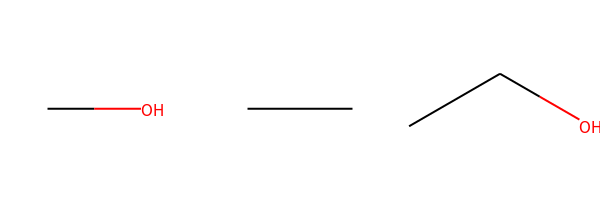

In [19]:
submols = []
for bit, atom_radius in bitinfo.items():
    atom, radius = atom_radius[0]
    if radius == 0:
        continue
    hit_atoms = Chem.FindAtomEnvironmentOfRadiusN(ethanol, radius, atom)
    submols.append(Chem.PathToSubmol(ethanol, hit_atoms))
Draw.MolsToGridImage(submols)

In [20]:
def substructures_of_bit_ecfp4_1024(mol, bit):
    bitinfo = {}
    Chem.GetMorganFingerprintAsBitVect(mol, 2, nBits=1024, bitInfo=bitinfo)
    submols = [Chem.PathToSubmol(mol, hit_atoms) for atom, radius in bitinfo.get(bit, [])]
    return submols

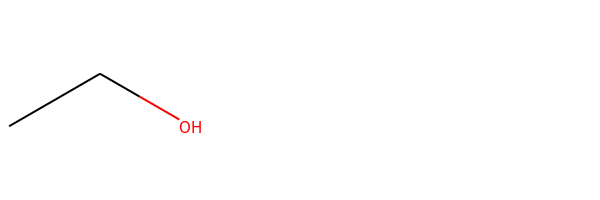

In [21]:
Draw.MolsToGridImage(substructures_of_bit_ecfp4_1024(ethanol, 386))

In [22]:
substructure_smiles = {}
for ligand in thrombin_ligands:
    for submol in substructures_of_bit_ecfp4_1024(ligand, 140):
        subsmiles = Chem.MolToSmiles(submol)
        substructure_smiles[subsmiles] = substructure_smiles.get(subsmiles, 0) + 1
substructure_smiles

{'N=CN': 780,
 'COC': 87,
 'CCC': 460,
 'NC=O': 23,
 'Ccn': 11,
 'CC=O': 78,
 'COc': 94,
 'CNS': 1,
 'CC=N': 44,
 'C=CC': 30,
 'cnC': 86,
 'CCO': 95,
 'CCN': 78,
 'ccC': 127,
 'CNC': 176,
 'CNc': 9,
 'C[SH]=O': 24,
 'NCN': 32,
 'ncN': 3,
 'O=CO': 2,
 'O=[N+][O-]': 4,
 'cC#N': 5,
 'C=C=C': 1,
 'C=Cc': 1,
 'C#Cc': 1,
 'C=NC': 4,
 'ccCl': 3,
 'C#CC': 7,
 'COS': 1,
 'CCn': 72,
 'CCc': 12,
 'CCS': 9,
 'cC=O': 1,
 'Ccs': 1,
 'ccc': 2,
 'cCO': 1,
 'CSC': 1,
 'CC#N': 2,
 'Cnn': 2}

In [23]:
substructure_smiles_db = {}
for drug in drugs:
    for submol in substructures_of_bit_ecfp4_1024(drug, 140):
        subsmiles = Chem.MolToSmiles(submol)
        substructure_smiles_db[subsmiles] = substructure_smiles_db.get(subsmiles, 0) + 1
substructure_smiles_db

{'N=CN': 55,
 'C=O.C=O': 30,
 'CCN': 73,
 'ccc': 112,
 'C=CN': 16,
 'O=CO': 5,
 'NC=O': 60,
 'OPO': 4,
 'C=O.CO': 5,
 'CC.CC': 8,
 'C=O.CN': 6,
 'COC': 29,
 'CNC': 30,
 'CSC': 24,
 'CO.CO': 2,
 'C=CO': 1,
 'NCS': 5,
 'O=S=O': 13,
 'cnc': 10,
 'csc': 12,
 'COc': 22,
 'coc': 2,
 'C=O.cn': 2,
 'c-n.cCl': 5,
 'C[NH2+]C': 3,
 'C=O.cO': 4,
 'ccO': 5,
 'C[Hg]Cl': 1,
 'NCN': 10,
 'cCl.cCl': 7,
 'CN.cc': 2,
 'C=O.cN': 3,
 'O=[SH][O-]': 4,
 'C=O.cCl': 2,
 'CCC': 65,
 'CO.cO': 1,
 'C=S.cn': 1,
 'CC.Cc': 3,
 'CCS': 8,
 'cOC': 7,
 'CO.cCl': 1,
 'C[SH]=O': 1,
 'CCO': 9,
 '[nH]cn': 1,
 'C=O.c=O': 2,
 'c=O.cn': 1,
 'ccC': 14,
 'CC.CO': 1,
 'C=O.c[nH]': 1,
 'C=O.NO': 2,
 'C=C.cc': 4,
 'CN.cCl': 2,
 'CN.CN': 3,
 'FCF': 5,
 'cNN': 1,
 'cnn': 4,
 'O=S.cBr': 1,
 'c-co': 1,
 'C=O.C[NH3+]': 1,
 'ccn': 12,
 'C=CC': 7,
 'ccCl': 2,
 'CC=O': 23,
 'NC=[NH2+]': 3,
 'CC=N': 1,
 'ccN': 2,
 'cnC': 7,
 'CNN': 1,
 'CC[SeH]': 1,
 'CSS': 10,
 'cCN': 6,
 'n[nH]n': 1,
 'OBO': 2,
 'NCO': 2,
 'Ccn': 7,
 'CC.CN': 2,
 'NC=S': 

Nejčastější fragment v thrombinové databázi na bitu 140 je N=CN (780x), stejné platí pro DrugBank (55x).